In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb

from utils.ubx import filter_ubx_event
from utils.streams import Dataset
from utils.EmotionalCitiesStreams import Stream
import utils.processing

%matplotlib inline
plt.style.use('ggplot')


In [2]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\FMUL2022_10_21_11_20_53"
dataset = Dataset(stream_root_folder, datasetlabel='FMUL2022_10_21_11_20_53')

#dataset.populate_streams(autoload = True)
#dataset.export_streams()
dataset.import_streams()

drift_correction_model = dataset.get_clockcalibration_ubx_to_harp_clock(plot_diagnosis=True)
dataset.add_ubx_georeference(event = "NAV-HPPOSLLH", calibrate_clock = True)



c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\Experiment\Analysis\AnalysisCode\utils\dataloader.py:74: UserWarning: Harp stream with Id 33 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\Experiment\Analysis\AnalysisCode\utils\dataloader.py:74: UserWarning: Harp stream with Id 223 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\Experiment\Analysis\AnalysisCode\utils\dataloader.py:74: UserWarning: Harp stream with Id 224 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\Experiment\Analysis\AnalysisCode\utils\dataloader.py:74: UserWarning: Harp stream with Id 225 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\Experiment\Analysis\AnalysisCode\uti

Opening file C:\Users\neurogears\Desktop\EC_datasets\FMUL2022_10_21_11_20_53\ubx.bin...


In [3]:
resampled = Stream.resample_temporospatial(input_data = dataset.streams.TK.AirQuality.IAQIndex.data,
                                           georeference=dataset.georeference)


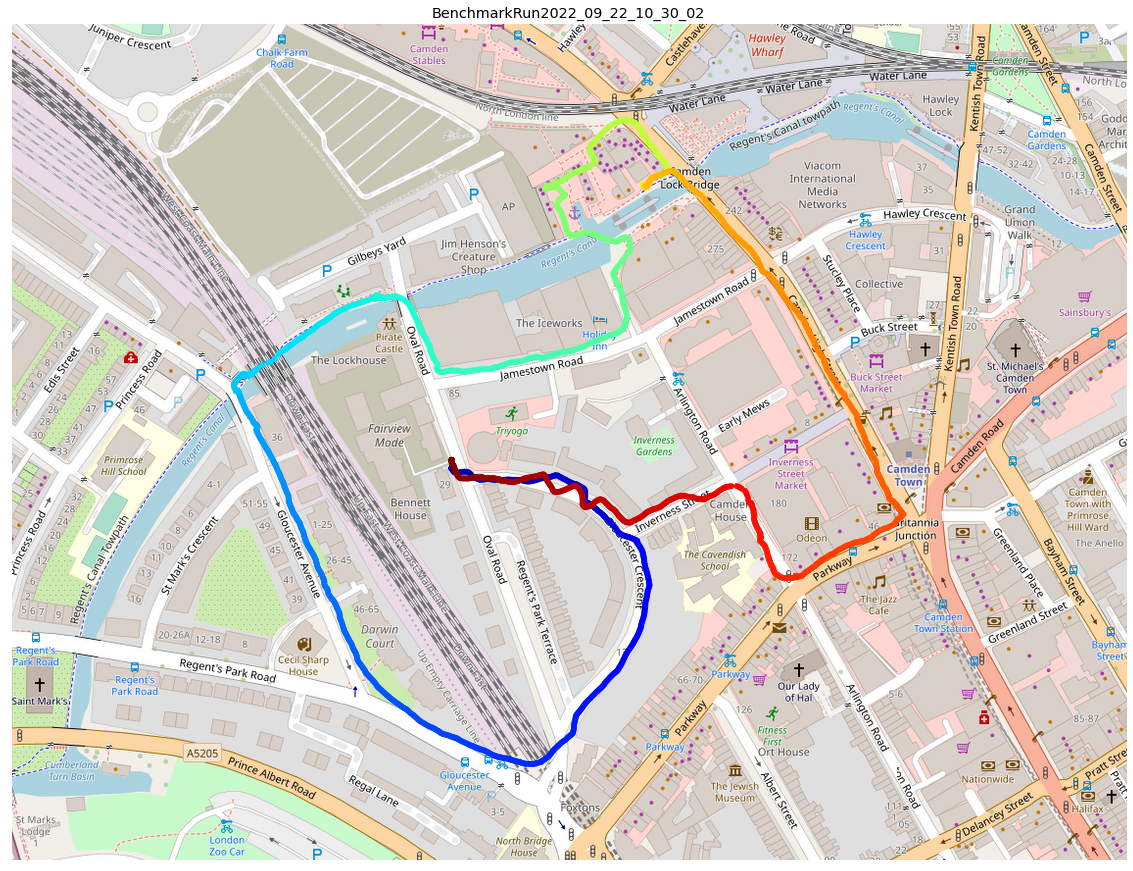

In [13]:
tiles = tmb.tiles.Stamen_Watercolour

fig = dataset.showmap(colorscale_override=dataset.georeference.index,
                      cmap = "jet",
                      markersize= 30
                      )
ax = fig.gca()
ax.set_title(dataset.datasetlabel)
fig.get_children()
#fig.savefig(r"C:\Users\neurogears\Desktop\map.png")
plt.show()



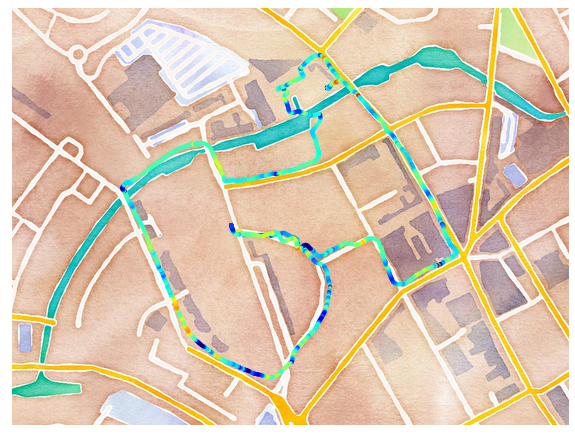

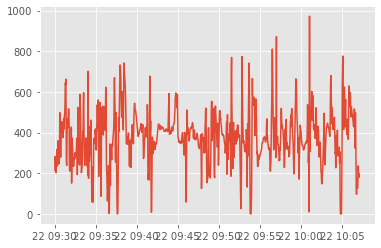

In [6]:
resampled = Stream.resample_temporospatial(input_data = dataset.streams.TK.CO2V2.CO2Conc.data,
                                           georeference=dataset.georeference)

fig = dataset.showmap(NavData=resampled, figsize=(10,10), tiles= tiles)
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


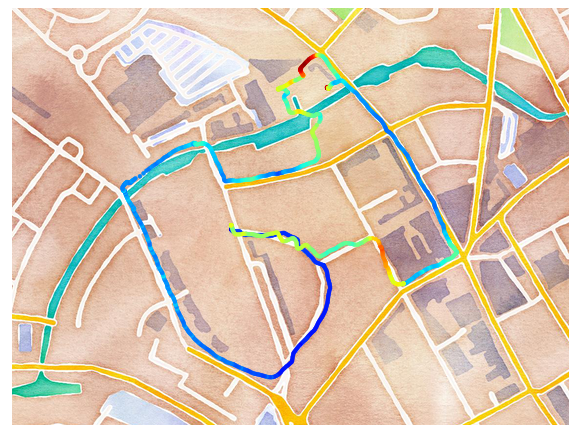

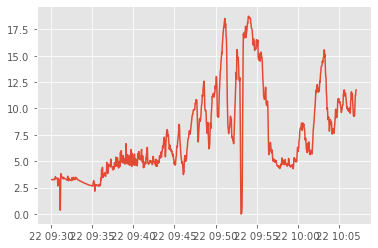

In [10]:
resampled = Stream.resample_temporospatial(input_data = dataset.streams.Empatica.data.E4_Gsr["Value"],
                                           georeference=dataset.georeference)

fig = dataset.showmap(NavData=resampled, figsize=(10,10), tiles= tiles)
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


In [54]:
def resample_temporospatial_circ(input_data, georeference,
                sampling_dt = datetime.timedelta(seconds = 2)):

    resampled = georeference.loc[:,"Lat":"Height"].resample(sampling_dt, origin='start').mean()
    resampled['Data'] = np.NAN
    for i in np.arange(len(resampled)-1):
        resampled['Data'].iloc[i] = circular_mean((input_data[
            (input_data.index >= resampled.index[i]) &
            (input_data.index < resampled.index[i+1])]))
    resampled['Data'].iloc[i+1] = circular_mean(input_data[input_data.index >= resampled.index[i+1]])
    return resampled

from scipy.stats import circmean
def circular_mean(x):
    return round(np.rad2deg(circmean(np.deg2rad(x))),2)

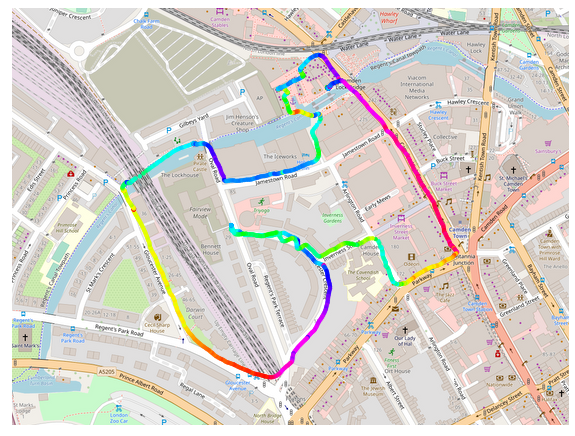

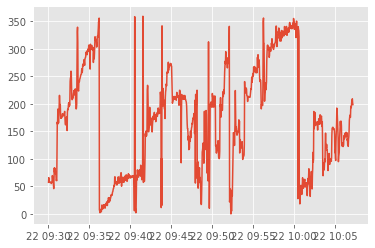

In [55]:

resampled = resample_temporospatial_circ(input_data = dataset.streams.Accelerometer.data['Orientation.X'],
                                           georeference=dataset.georeference)

fig = dataset.showmap(NavData=resampled, figsize=(10,10), cmap = 'hsv')
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


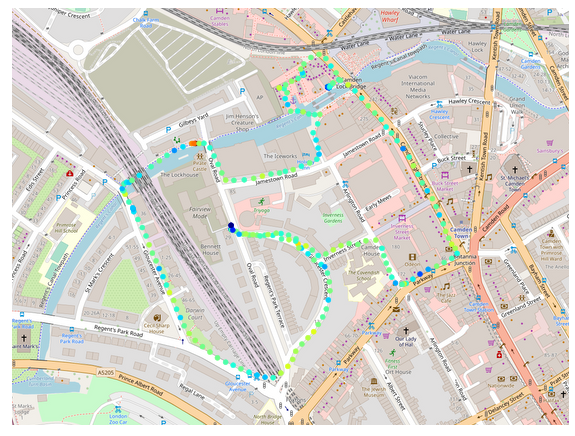

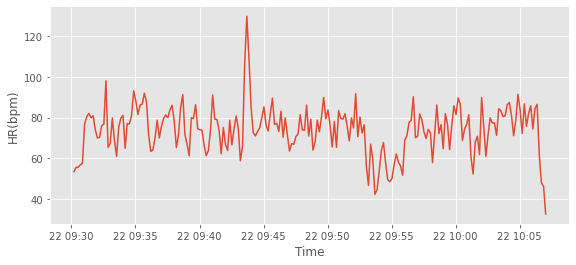

In [16]:
hr = utils.processing.heartrate_from_ecg(dataset.streams.BioData.ECG,
                                         fs = 250, max_heartrate_bpm = 250.0,
                                        peak_height = 800, smooth_win = 10)
resampled = Stream.resample_temporospatial(input_data = hr,
                                           georeference=dataset.georeference,
                                           sampling_dt = datetime.timedelta(seconds = 10))
fig = dataset.showmap(NavData=resampled, figsize=(10,10), cmap = 'jet', markersize = 25 )
plt.show()
plt.figure(figsize= (9.3,4))
plt.plot(resampled.Data)
plt.xlabel('Time')
plt.ylabel('HR(bpm)')
plt.show()


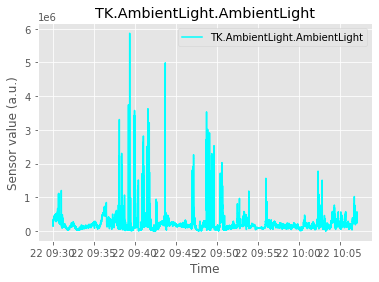

In [3]:
#dataset.streams.TK.AmbientLight.AmbientLight.load()
dataset.streams.TK.AmbientLight.AmbientLight.plot(color = "cyan")
plt.legend()